<p style="text-align:center;">
  <span style="font-size:32px; font-weight:bold;">End-to-End Credit Risk Scoring</span><br>
  <span style="font-size:20px;">From Data Cleaning to Business Dashboard with a Neural Network Model</span><br><br>
  <span style="font-size:16px;"><b>Or Ben-Haim</b></span><br>
  <span style="font-size:14px;">August 2025</span><br>
  <span style="font-size:14px; font-style:italic;">Python · PyTorch · Neural Networks · Scikit-learn · Pandas · Tableau</span>
</p>




# Project Overview  Credit Risk Prediction

The goal of this project is to predict the level of credit risk for people applying for loans, using their personal and financial information. The dataset used for this analysis is the publicly available **Credit Risk Dataset** from Kaggle ([link](https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data)). By analyzing features such as income, age, loan amount, and credit history, we trained a deep learning model capable of estimating the likelihood of repayment for each applicant.

This type of predictive modeling is highly valuable for banks, lenders, and fintech companies that need to make quick and reliable decisions when approving or rejecting loan applications. Instead of relying solely on manual review or rigid rule-based systems, our approach leverages machine learning  specifically a neural network  to deliver a more flexible and accurate risk assessment.

Predictions were compared with actual loan grades and combined into a clean dataset prepared for visualization in a Tableau dashboard. This dashboard enables decision-makers to explore results interactively, uncover patterns, evaluate misclassification impacts, and monitor model performance across different customer segments.

The project follows a full data science workflow  from dataset acquisition, cleaning, and feature engineering, through model training, to the creation of a business-ready analytical tool  all aimed at supporting better, data-driven credit decisions.



# Step 1: Data Cleaning & Feature Engineering

In this step, I prepared the raw credit risk dataset for modeling. After identifying and handling missing values with median imputation, I transformed key categorical variables  such as loan grade, home ownership, loan intent, and credit default history  into numerical formats. This streamlined the dataset for machine learning workflows. The cleaned dataset was exported as a new CSV file for use in the next phase.


In [ ]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')

# Step 3: Create a clean copy to work on
df_clean = df.copy()

# Step 4: Overview of the dataset
print("Dataset shape:", df_clean.shape)
print("Column information:")
print(df_clean.info())

# Step 5: Check missing values
missing = df_clean.isnull().sum()
missing_percent = (missing / len(df_clean)) * 100

print("\nMissing value summary:")
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)
print(missing_summary)

# Step 6: Total missing cells and percentage of the entire dataset
total_cells = df_clean.shape[0] * df_clean.shape[1]
total_missing = missing.sum()
percent_missing_total = (total_missing / total_cells) * 100
print("\nTotal missing values in dataset:", total_missing)
print("Total cells in dataset:", total_cells)
print(f"Percentage of missing data: {percent_missing_total:.2f}%")

# Step 7: Fill missing values using the median
emp_median = df_clean['person_emp_length'].median()
int_rate_median = df_clean['loan_int_rate'].median()

df_clean['person_emp_length'] = df_clean['person_emp_length'].fillna(emp_median)
df_clean['loan_int_rate'] = df_clean['loan_int_rate'].fillna(int_rate_median)

print("\nMissing values were filled with median values:")
print(f"'person_emp_length' median: {emp_median}")
print(f"'loan_int_rate' median: {int_rate_median}")

# Step 8: Map loan_grade from letters to numeric scores
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df_clean['loan_grade_numeric'] = df_clean['loan_grade'].map(grade_mapping)

if df_clean['loan_grade_numeric'].isnull().sum() > 0:
    print("Warning: Some values in 'loan_grade' were not mapped correctly.\n")
else:
    print("Loan grade mapping completed successfully.\n")

print("Unique values in original 'loan_grade':", sorted(df_clean['loan_grade'].unique()))
print("Unique values in new 'loan_grade_numeric':", sorted(df_clean['loan_grade_numeric'].unique()))

print("\nSample mapping (first 10 rows):")
print(df_clean[['loan_grade', 'loan_grade_numeric']].head(10))

df_clean.drop(columns=['loan_grade'], inplace=True)
print("\nDropped original column 'loan_grade'.")

# Step 9: Manual mapping of other categorical features
ownership_mapping = {'RENT': 0, 'OTHER': 1, 'OWN': 2, 'MORTGAGE': 3}
df_clean['person_home_ownership_num'] = df_clean['person_home_ownership'].map(ownership_mapping)

intent_mapping = {
    'EDUCATION': 0, 'MEDICAL': 1, 'VENTURE': 2,
    'HOMEIMPROVEMENT': 3, 'DEBTCONSOLIDATION': 4, 'PERSONAL': 5
}
df_clean['loan_intent_num'] = df_clean['loan_intent'].map(intent_mapping)

default_mapping = {'N': 0, 'Y': 1}
df_clean['cb_person_default_on_file_num'] = df_clean['cb_person_default_on_file'].map(default_mapping)

print("\nFirst 5 rows after mapping:")
print(df_clean[[
    'person_home_ownership', 'person_home_ownership_num',
    'loan_intent', 'loan_intent_num',
    'cb_person_default_on_file', 'cb_person_default_on_file_num'
]].head())

df_clean.drop(columns=[
    'person_home_ownership',
    'loan_intent',
    'cb_person_default_on_file'
], inplace=True)
print("\nDropped original categorical columns.")

# Step 10: Final confirmation of cleaned dataset
print("\nCleaned dataset is ready. df_clean has shape:", df_clean.shape)
print("\nFirst few rows of df_clean:")
print(df_clean.head())
import os

# Original file path
original_path = '/content/credit_risk_dataset.csv'

# Get the directory where the original file is located
original_dir = os.path.dirname(original_path)

# Create a new filename for the cleaned dataset
cleaned_filename = 'credit_risk_dataset_clean.csv'

# Full path to save the cleaned file
cleaned_path = os.path.join(original_dir, cleaned_filename)

# Save the cleaned DataFrame
df_clean.to_csv(cleaned_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_path}")


Dataset shape: (32581, 12)
Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory

# Step 2: Outlier Mitigation & Feature Rescaling

In this step, I visualized all numeric features using boxplots to detect potential outliers. The original data revealed extreme values, especially in `person_income` and `loan_amnt`.

To reduce their impact without distorting the underlying data, I applied `RobustScaler`, which normalizes features based on the **median** and **interquartile range** — making it naturally robust to outliers.

To further cap the influence of extreme values, I applied **Winsorization** on both features at the 1% level. This clipped the top and bottom 1% of values, affecting approximately 2% of income values and 1% of loan amounts.

The post-transformation boxplot confirms that the distributions are now more compact and ready for modeling.


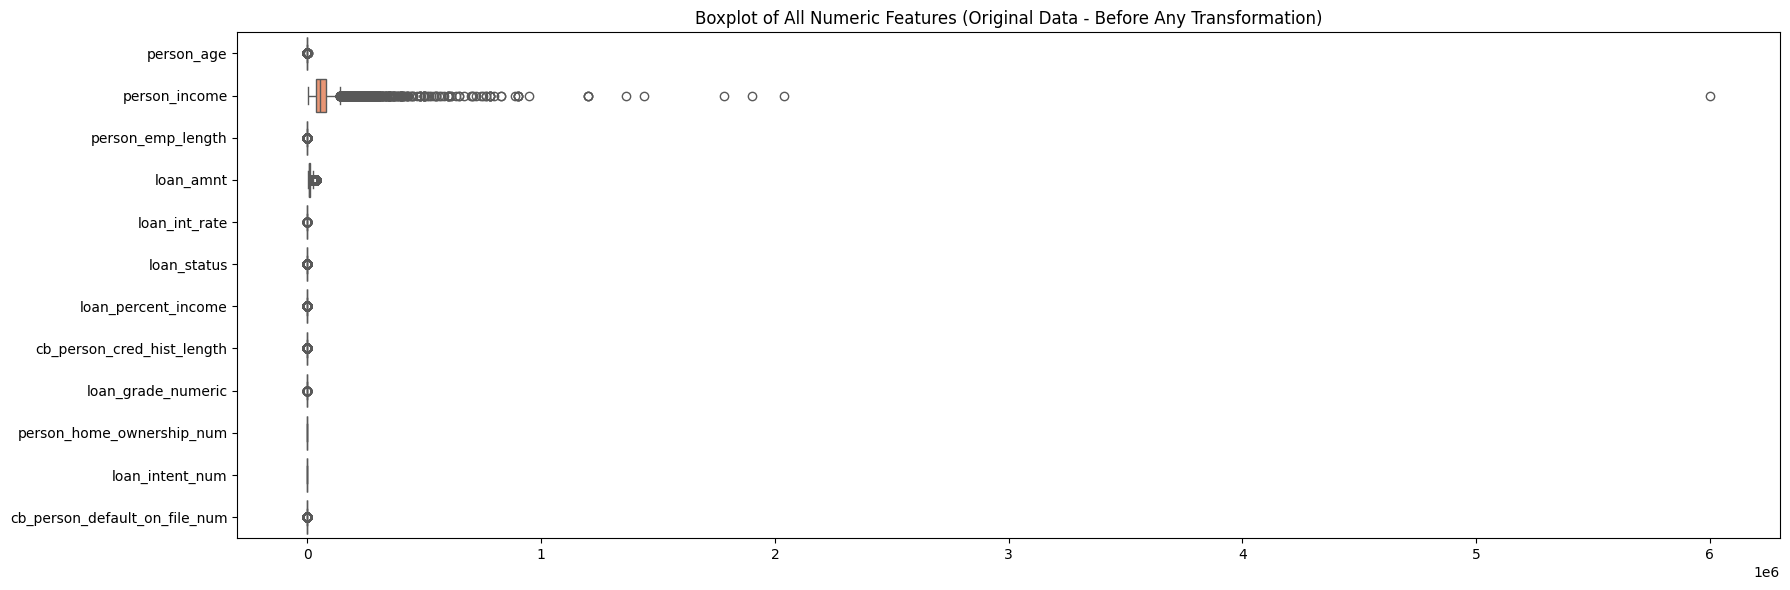

Winsorized 'person_income': 646 rows changed (1.98%)
Winsorized 'loan_amnt': 336 rows changed (1.03%)


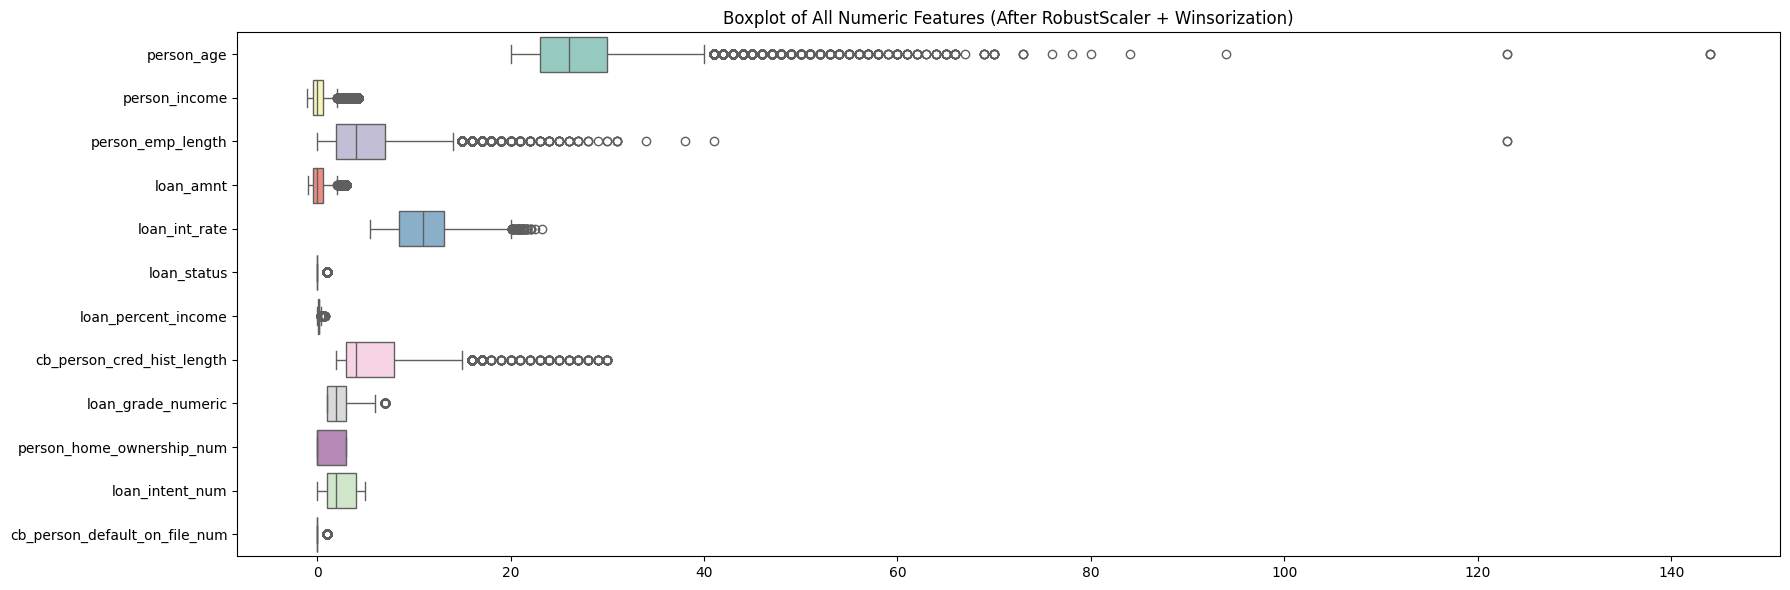

Transformed dataset saved to 'credit_risk_dataset_transformed.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler

# Load clean dataset
data = pd.read_csv("/content/credit_risk_dataset_clean.csv")

# Save original before any transformation
data_original = data.copy()

# Boxplot before transformation
plt.figure(figsize=(18, 6))
sns.boxplot(data=data_original.select_dtypes(include='number'), orient='h', palette="Set2")
plt.title("Boxplot of All Numeric Features (Original Data - Before Any Transformation)")
plt.tight_layout()
plt.show()

# Create a copy for transformation
credit_risk_dataset_transformed = data.copy()

# Apply RobustScaler
scaler = RobustScaler()
credit_risk_dataset_transformed[['person_income', 'loan_amnt']] = scaler.fit_transform(
    credit_risk_dataset_transformed[['person_income', 'loan_amnt']]
)

# Save scaled values before winsorization
original_income = credit_risk_dataset_transformed['person_income'].copy()
original_loan = credit_risk_dataset_transformed['loan_amnt'].copy()

# Apply Winsorization
credit_risk_dataset_transformed['person_income'] = winsorize(
    credit_risk_dataset_transformed['person_income'], limits=[0.01, 0.01]
)
credit_risk_dataset_transformed['loan_amnt'] = winsorize(
    credit_risk_dataset_transformed['loan_amnt'], limits=[0.01, 0.01]
)

# Count changes
income_changed = (original_income != credit_risk_dataset_transformed['person_income']).sum()
loan_changed = (original_loan != credit_risk_dataset_transformed['loan_amnt']).sum()
total_rows = len(credit_risk_dataset_transformed)

print(f"Winsorized 'person_income': {income_changed} rows changed ({income_changed/total_rows:.2%})")
print(f"Winsorized 'loan_amnt': {loan_changed} rows changed ({loan_changed/total_rows:.2%})")

# Boxplot after transformation
plt.figure(figsize=(18, 6))
sns.boxplot(data=credit_risk_dataset_transformed.select_dtypes(include='number'), orient='h', palette="Set3")
plt.title("Boxplot of All Numeric Features (After RobustScaler + Winsorization)")
plt.tight_layout()
plt.show()

# Save transformed dataset
credit_risk_dataset_transformed.to_csv("/content/credit_risk_dataset_transformed.csv", index=False)
print("Transformed dataset saved to 'credit_risk_dataset_transformed.csv'")


# Step 3: Neural Network Model for Loan Grade Prediction

In this stage, I built a fully connected neural network using PyTorch to predict loan grades (1–7) as a multi-class classification task. The model takes into account features like age, income, employment length, loan characteristics, and credit history.

The data was standardized using `StandardScaler` and split into training and test sets. The architecture includes two hidden layers with ReLU activations and dropout for regularization.

Training ran for 20 epochs, achieving stable convergence with a final test accuracy of **~84%**. Despite class imbalance, the model performed strongly on major classes — reaching AUC scores above 0.95 in most cases. Minority classes (Grades 6–7) were underrepresented, which impacted their performance.

Evaluation included:
- **Loss & Accuracy trends** showing smooth convergence  
- **Confusion matrix** revealing strong prediction on Grades 1–3  
- **ROC curves (OvR)** confirming robust class separability  
- **Class distribution chart** highlighting the imbalance challenge

This step demonstrates the model’s capacity to learn complex patterns in credit data and provides a strong foundation for further improvement via balancing techniques or ordinal-specific architectures.


Using device: cuda
Epoch 1/20 - Loss: 1.1450, Accuracy: 0.5850
Epoch 2/20 - Loss: 0.6853, Accuracy: 0.7612
Epoch 3/20 - Loss: 0.6243, Accuracy: 0.7879
Epoch 4/20 - Loss: 0.5907, Accuracy: 0.8031
Epoch 5/20 - Loss: 0.5722, Accuracy: 0.8086
Epoch 6/20 - Loss: 0.5536, Accuracy: 0.8106
Epoch 7/20 - Loss: 0.5387, Accuracy: 0.8188
Epoch 8/20 - Loss: 0.5292, Accuracy: 0.8224
Epoch 9/20 - Loss: 0.5215, Accuracy: 0.8253
Epoch 10/20 - Loss: 0.5167, Accuracy: 0.8268
Epoch 11/20 - Loss: 0.5072, Accuracy: 0.8285
Epoch 12/20 - Loss: 0.5061, Accuracy: 0.8278
Epoch 13/20 - Loss: 0.5004, Accuracy: 0.8302
Epoch 14/20 - Loss: 0.4971, Accuracy: 0.8289
Epoch 15/20 - Loss: 0.4938, Accuracy: 0.8322
Epoch 16/20 - Loss: 0.4876, Accuracy: 0.8328
Epoch 17/20 - Loss: 0.4885, Accuracy: 0.8328
Epoch 18/20 - Loss: 0.4860, Accuracy: 0.8355
Epoch 19/20 - Loss: 0.4799, Accuracy: 0.8347
Epoch 20/20 - Loss: 0.4827, Accuracy: 0.8353

Classification Report:
              precision    recall  f1-score   support

           

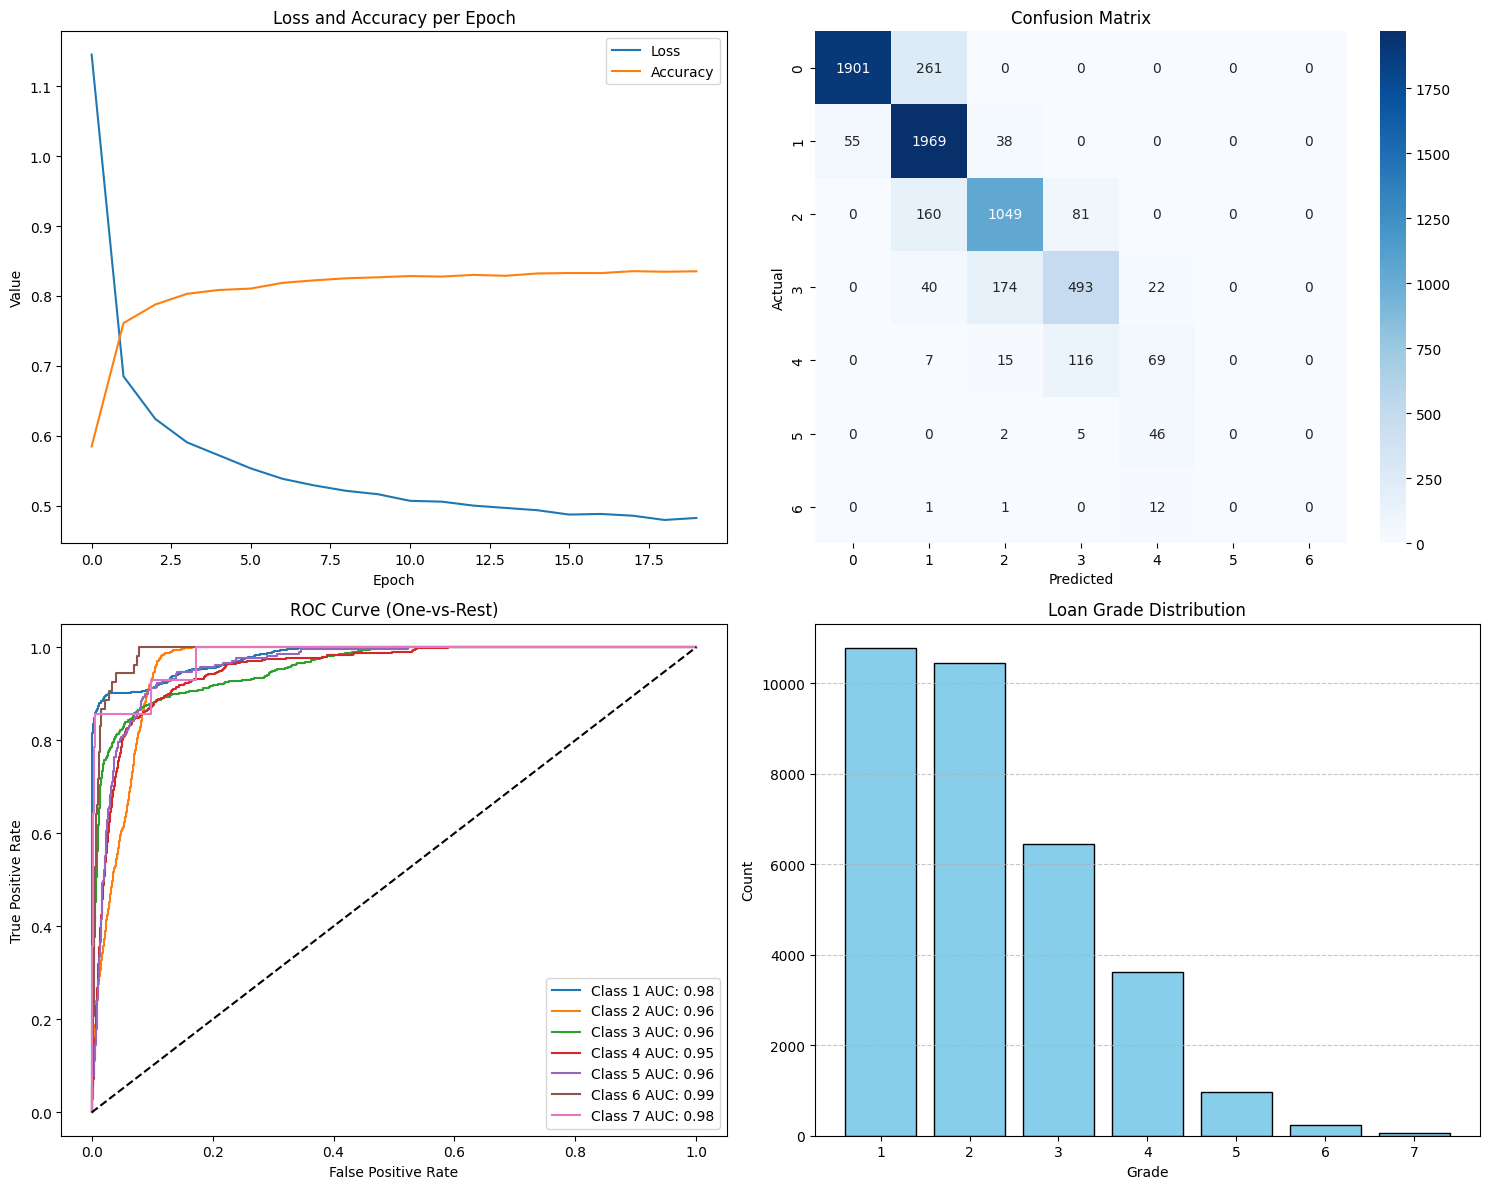

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load data
df = pd.read_csv("/content/credit_risk_dataset_transformed.csv")

# Features and target
feature_cols = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income',
    'cb_person_cred_hist_length', 'person_home_ownership_num',
    'loan_intent_num', 'cb_person_default_on_file_num'
]
target_col = 'loan_grade_numeric'
X = df[feature_cols].values
y = df[target_col].values - 1  # shift to 0-based

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Dataset
class CreditDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_loader = DataLoader(CreditDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(CreditDataset(X_test, y_test), batch_size=128)

# Model
class OrdinalNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OrdinalNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, output_dim)
        )
    def forward(self, x): return self.net(x)

model = OrdinalNN(X.shape[1], 7).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
losses, accuracies = [], []
for epoch in range(20):
    model.train()
    total_loss = 0
    correct = total = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    acc = correct / total
    losses.append(total_loss / len(train_loader))
    accuracies.append(acc)
    print(f"Epoch {epoch+1}/20 - Loss: {losses[-1]:.4f}, Accuracy: {acc:.4f}")

# Evaluation
model.eval()
y_true, y_pred, y_score = [], [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = torch.softmax(outputs, dim=1)
        y_score.append(probs.cpu().numpy())
        _, predicted = torch.max(probs, 1)
        y_true.append(y_batch.numpy())
        y_pred.append(predicted.cpu().numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
y_score = np.concatenate(y_score)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4, zero_division=0))

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Loss & Accuracy
axs[0, 0].plot(losses, label="Loss")
axs[0, 0].plot(accuracies, label="Accuracy")
axs[0, 0].set_title("Loss and Accuracy per Epoch")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Value")
axs[0, 0].legend()

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title("Confusion Matrix")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

# 3. ROC Curve (OvR)
y_bin = label_binarize(y_true, classes=list(range(7)))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(7):
    axs[1, 0].plot(fpr[i], tpr[i], label=f"Class {i+1} AUC: {roc_auc[i]:.2f}")
axs[1, 0].plot([0, 1], [0, 1], 'k--')
axs[1, 0].set_title("ROC Curve (One-vs-Rest)")
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")
axs[1, 0].legend()

# 4. Loan Grade Distribution
grade_counts = df['loan_grade_numeric'].value_counts().sort_index()
axs[1, 1].bar(grade_counts.index.astype(str), grade_counts.values, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Loan Grade Distribution')
axs[1, 1].set_xlabel('Grade')
axs[1, 1].set_ylabel('Count')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




# Summary: Neural Network Model Assumptions and Next Steps

We implemented a neural network in PyTorch to predict credit risk ratings across seven ordinal classes (`loan_grade_numeric` from 1 to 7). The model was trained on standardized numerical features without any dimensionality reduction or modification to the label distribution.

# Evaluation of Model Assumptions

1. **Numerical Input and Scaling**
   All input features are numeric and were standardized using `StandardScaler`. This supports model convergence and stable optimization.

2. **IID Assumption (Independent and Identically Distributed)**
   The dataset was randomly split into training and test sets using `train_test_split`, ensuring that samples are independent and drawn from the same distribution.

3. **Loss Function and Output Configuration**
   We used `CrossEntropyLoss` along with integer labels and raw logits. This is the appropriate setup for multiclass classification tasks.

4. **Model Complexity and Overfitting Control**
   The neural network architecture includes two hidden layers with dropout for regularization. Training over 20 epochs shows consistent improvements in accuracy and loss, with no signs of overfitting.

5. **Class Imbalance**
   This assumption is currently **not satisfied**. The target variable is highly imbalanced. For example, grade 1 includes over 10,000 samples, while grade 7 has fewer than 100. As a result, the model performs poorly on rare classes, with low recall and precision.

6. **Multicollinearity and Redundant Inputs**
   While not formally tested, neural networks are generally robust to multicollinearity. Since the goal is prediction rather than interpretation, this is not a concern at this stage.

# Conclusion and Next Steps

All formal assumptions of the model are satisfied except for class balance. Performance is strong for the dominant classes but weak for the rare ones. In the next stage, we plan to address this imbalance by collapsing grades 5, 6, and 7 into a single group (grade 4), which will reduce sparsity in the label space and improve classification performance.


Using device: cuda
Epoch 1/20, Loss: 0.8667, Accuracy: 0.6249
Epoch 2/20, Loss: 0.5300, Accuracy: 0.7978
Epoch 3/20, Loss: 0.4978, Accuracy: 0.8180
Epoch 4/20, Loss: 0.4715, Accuracy: 0.8319
Epoch 5/20, Loss: 0.4557, Accuracy: 0.8413
Epoch 6/20, Loss: 0.4391, Accuracy: 0.8469
Epoch 7/20, Loss: 0.4311, Accuracy: 0.8489
Epoch 8/20, Loss: 0.4241, Accuracy: 0.8542
Epoch 9/20, Loss: 0.4195, Accuracy: 0.8551
Epoch 10/20, Loss: 0.4107, Accuracy: 0.8596
Epoch 11/20, Loss: 0.4065, Accuracy: 0.8600
Epoch 12/20, Loss: 0.4018, Accuracy: 0.8636
Epoch 13/20, Loss: 0.3980, Accuracy: 0.8634
Epoch 14/20, Loss: 0.3993, Accuracy: 0.8654
Epoch 15/20, Loss: 0.3934, Accuracy: 0.8641
Epoch 16/20, Loss: 0.3919, Accuracy: 0.8667
Epoch 17/20, Loss: 0.3926, Accuracy: 0.8649
Epoch 18/20, Loss: 0.3888, Accuracy: 0.8672
Epoch 19/20, Loss: 0.3849, Accuracy: 0.8668
Epoch 20/20, Loss: 0.3841, Accuracy: 0.8689


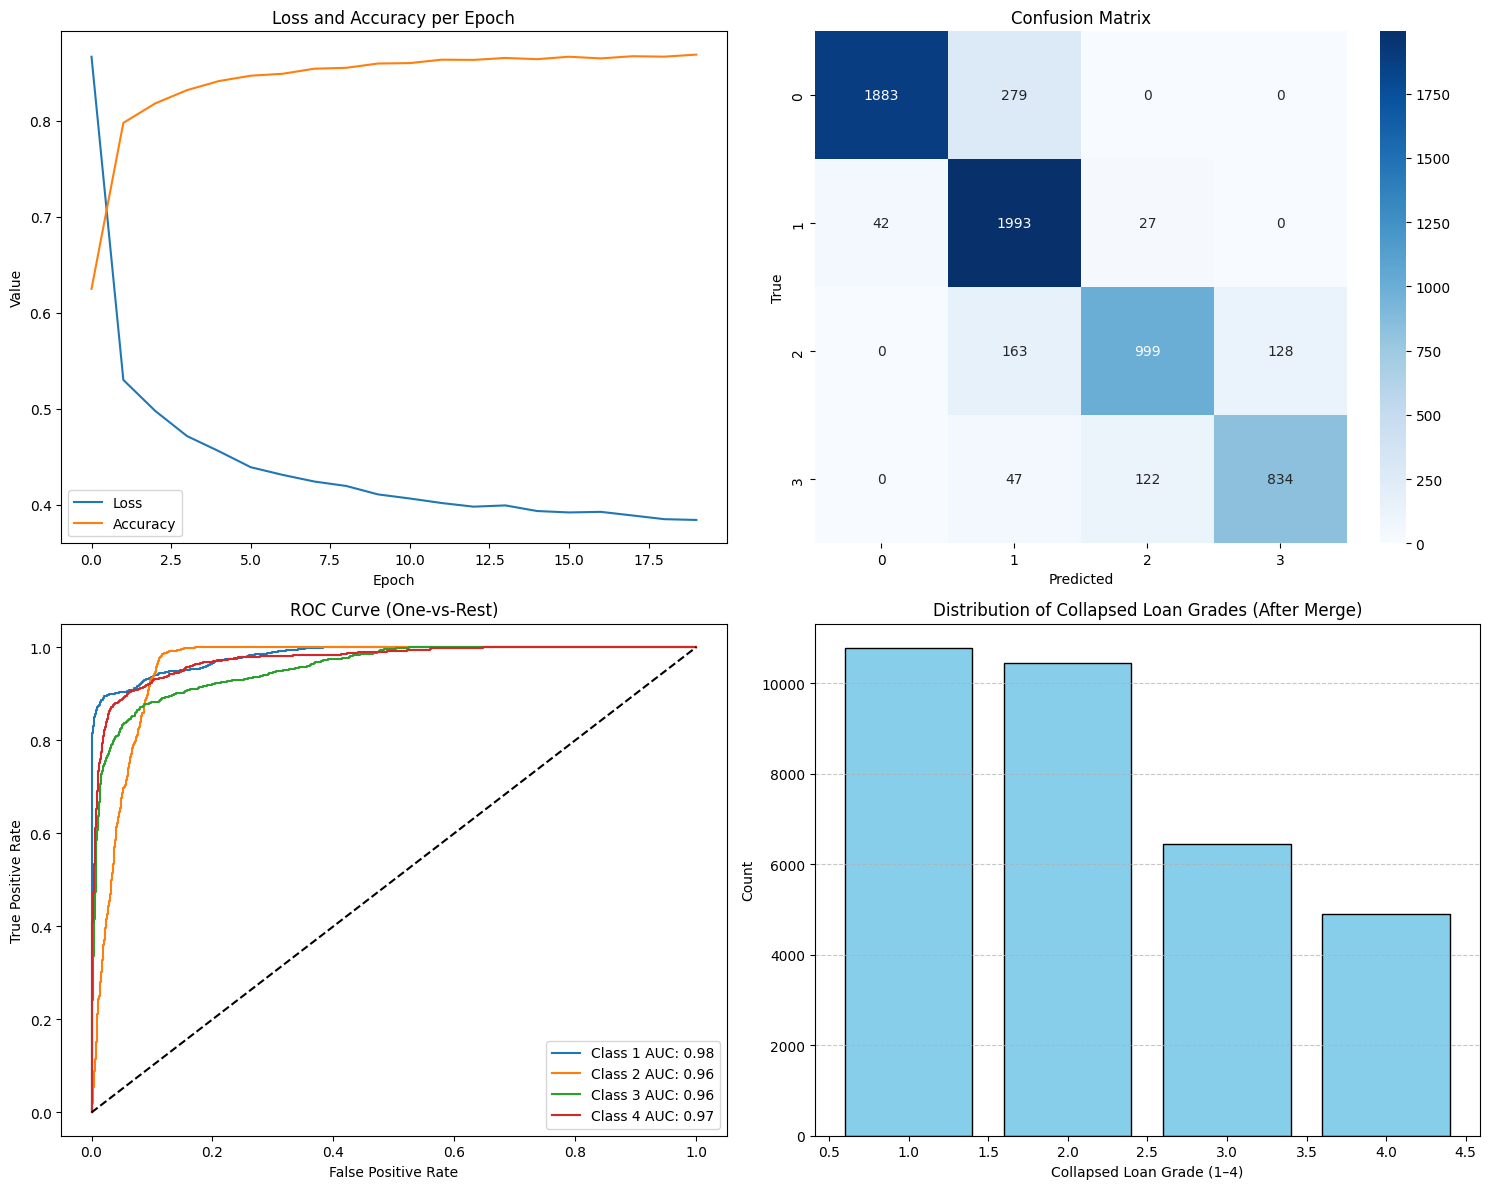


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2162
           1       0.80      0.97      0.88      2062
           2       0.87      0.77      0.82      1290
           3       0.87      0.83      0.85      1003

    accuracy                           0.88      6517
   macro avg       0.88      0.86      0.87      6517
weighted avg       0.88      0.88      0.88      6517



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Clean GPU memory
torch.cuda.empty_cache()

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load data
df = pd.read_csv("/content/credit_risk_dataset_transformed.csv")

# Merge loan grades 5–7 into one class (4)
df['loan_grade_numeric_collapsed'] = df['loan_grade_numeric'].replace({5: 4, 6: 4, 7: 4})

# Feature columns and updated target
feature_cols = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income',
    'cb_person_cred_hist_length', 'person_home_ownership_num',
    'loan_intent_num', 'cb_person_default_on_file_num'
]
target_col = 'loan_grade_numeric_collapsed'

X = df[feature_cols].values
y = df[target_col].values - 1  # shift labels to 0–3

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Custom dataset class
class CreditDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(CreditDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(CreditDataset(X_test, y_test), batch_size=128)

# Neural network model
class OrdinalNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OrdinalNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = OrdinalNN(X.shape[1], 4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 20
losses, accs = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    accs.append(acc)
    losses.append(running_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {losses[-1]:.4f}, Accuracy: {acc:.4f}")

# Evaluation
model.eval()
y_true, y_pred, y_proba = [], [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        y_proba.extend(probs.cpu().numpy())
        y_pred.extend(torch.argmax(probs, dim=1).cpu().numpy())
        y_true.extend(labels.numpy())

# Combine plots: Loss + Accuracy, Confusion Matrix, ROC, Distribution
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Loss & Accuracy
axs[0, 0].plot(losses, label='Loss')
axs[0, 0].plot(accs, label='Accuracy')
axs[0, 0].set_title('Loss and Accuracy per Epoch')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title("Confusion Matrix")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("True")

# ROC Curve
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
y_proba = np.array(y_proba)
for i in range(4):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
    auc = roc_auc_score(y_true_bin[:, i], y_proba[:, i])
    axs[1, 0].plot(fpr, tpr, label=f"Class {i+1} AUC: {auc:.2f}")
axs[1, 0].plot([0, 1], [0, 1], 'k--')
axs[1, 0].set_title("ROC Curve (One-vs-Rest)")
axs[1, 0].set_xlabel("False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")
axs[1, 0].legend()

# Class Distribution (after merging)
unique, counts = np.unique(y, return_counts=True)
axs[1, 1].bar(unique + 1, counts, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of Collapsed Loan Grades (After Merge)')
axs[1, 1].set_xlabel('Collapsed Loan Grade (1–4)')
axs[1, 1].set_ylabel('Count')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, zero_division=0))


# Step 4: Label Collapsing & Model Retraining

To address the performance issues caused by extreme class imbalance, I collapsed loan grades 5, 6, and 7 into a single category (Grade 4), reducing the classification task from 7 to 4 classes. This restructuring created a more balanced label distribution while preserving the ordinal structure of the data.

I then retrained the same neural network architecture on the updated labels. The model quickly converged, reaching **~87% accuracy** after 20 epochs. Performance improved across all classes, including the previously underrepresented ones.

The updated evaluation shows:
- **Consistent loss decrease and accuracy improvement** over epochs  
- **Strong classification performance** with precision and recall above 85% for all groups  
- **AUC scores between 0.96 and 0.99**, indicating excellent separability  
- **Balanced confusion matrix**, showing fewer misclassifications between adjacent grades  
- **Improved F1 macro (0.87)** and weighted average metrics

This step demonstrates how strategic label restructuring can significantly boost multi class classification performance in imbalanced ordinal datasets.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Load transformed dataset (used for training)
df = pd.read_csv("/content/credit_risk_dataset_transformed.csv")

# Keep original loan grade
df['loan_grade_numeric_original'] = df['loan_grade_numeric']

# Collapse grades 5, 6, 7 into 4
df['loan_grade_numeric_collapsed'] = df['loan_grade_numeric'].replace({5: 4, 6: 4, 7: 4})

# Define features and target
feature_cols = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income',
    'cb_person_cred_hist_length', 'person_home_ownership_num',
    'loan_intent_num', 'cb_person_default_on_file_num'
]
target_col = 'loan_grade_numeric_collapsed'

# Extract features and labels
X = df[feature_cols].values
y = df[target_col].values - 1  # From 0 to 3

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define PyTorch dataset
class CreditDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

full_loader = DataLoader(CreditDataset(X_scaled, y), batch_size=128, shuffle=True)

# Define neural network model
class OrdinalNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(64, 32), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(32, output_dim)
        )
    def forward(self, x): return self.net(x)

# Initialize model, loss, optimizer
model = OrdinalNN(X.shape[1], 4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model on full dataset
for epoch in range(20):
    model.train()
    for inputs, labels in full_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Predict using trained model
model.eval()
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
with torch.no_grad():
    outputs = model(X_tensor)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# Add predictions and true values to DataFrame
df['True_Grade'] = y + 1               # From 1 to 4
df['Predicted_Grade'] = predictions + 1
df['Grade_Error_Distance'] = (df['True_Grade'] - df['Predicted_Grade']).abs()

# Add descriptive comparison column
grade_map = {1: "A", 2: "B", 3: "C", 4: "D"}
def describe_grade_comparison(true, pred):
    if true == pred:
        return f"Predicted correctly as {grade_map[true]}"
    elif pred < true:
        return f"Overestimated: Predicted {grade_map[pred]} instead of {grade_map[true]}"
    else:
        return f"Underestimated: Predicted {grade_map[pred]} instead of {grade_map[true]}"

df['Grade_Comparison_Description'] = df.apply(
    lambda row: describe_grade_comparison(row['True_Grade'], row['Predicted_Grade']), axis=1
)

# Add letter versions of grades
df['True_Grade_Letter'] = df['True_Grade'].map(grade_map)
df['Predicted_Grade_Letter'] = df['Predicted_Grade'].map(grade_map)

# Create Age_Group column
age_bins = [0, 29, 39, 49, 59, 69, 120]
age_labels = ['20-29', '30–39', '40–49', '50–59', '60–69', '70+']
df['Age_Group'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels, right=True)

# Load original untransformed data to extract raw person_income and loan_amnt
df_raw = pd.read_csv("/content/credit_risk_dataset_clean.csv")

# Add raw columns to transformed + predicted DataFrame
df['Raw_person_income'] = df_raw['person_income']
df['Raw_loan_amnt'] = df_raw['loan_amnt']

# Map numeric columns back to categorical values
home_ownership_map = {0: 'RENT', 1: 'OTHER', 2: 'OWN', 3: 'MORTGAGE'}
loan_intent_map = {
    0: 'EDUCATION', 1: 'MEDICAL', 2: 'VENTURE',
    3: 'HOME-IMPROVEMENT', 4: 'DEBT-CONSOLIDATION', 5: 'PERSONAL'
}
default_on_file_map = {0: 'N', 1: 'Y'}

# Apply mappings to create new columns
df['person_home_ownership_label'] = df['person_home_ownership_num'].map(home_ownership_map)
df['loan_intent_label'] = df['loan_intent_num'].map(loan_intent_map)
df['cb_person_default_on_file_label'] = df['cb_person_default_on_file_num'].map(default_on_file_map)

# Remove unneeded numeric columns after mapping
df.drop(columns=[
    'person_home_ownership_num',
    'loan_intent_num',
    'cb_person_default_on_file_num',
    'person_income',
    'loan_amnt',
    'loan_grade_numeric_original',
    'loan_grade_numeric_collapsed'
], inplace=True)

# Final column selection including all relevant columns
selected_cols = [
    'True_Grade', 'True_Grade_Letter',
    'Predicted_Grade', 'Predicted_Grade_Letter',
    'Grade_Error_Distance', 'Grade_Comparison_Description',
    'Raw_person_income', 'Raw_loan_amnt',
    'person_age', 'Age_Group',
    'person_emp_length', 'loan_int_rate',
    'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length',
    'person_home_ownership_label', 'loan_intent_label', 'cb_person_default_on_file_label'
]

# Save as modern Excel file
df.to_excel("loan_predictions_final_clean.xlsx", index=False, columns=selected_cols)
print("Final dataset saved as 'loan_predictions_final_clean.xlsx'")


Device: cuda
Final dataset saved as 'loan_predictions_final_clean.xlsx'




# Step 5 Model vs Actual: Analytical Summary

Correct predictions show a clear interest rate hierarchy (D highest, A lowest), but in errors the gap narrows, exposing weak separation at C/D and A/B boundaries. Grade B is most accurate, while Grade C is most error-prone, often confused with neighbors. The model has a conservative bias, notably downgrading A to B, which may limit opportunities for low-risk clients. Loan sums are consistently underestimated across all grades, especially C, risking misinformed capital allocation. Calibration and stronger mid-tier separation are needed.

**Interactive Tableau Dashboard:** [View Here](https://public.tableau.com/views/LoanGradePredictionAnalysis/LoanGradesPopulationInsightsModelvsActual?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)







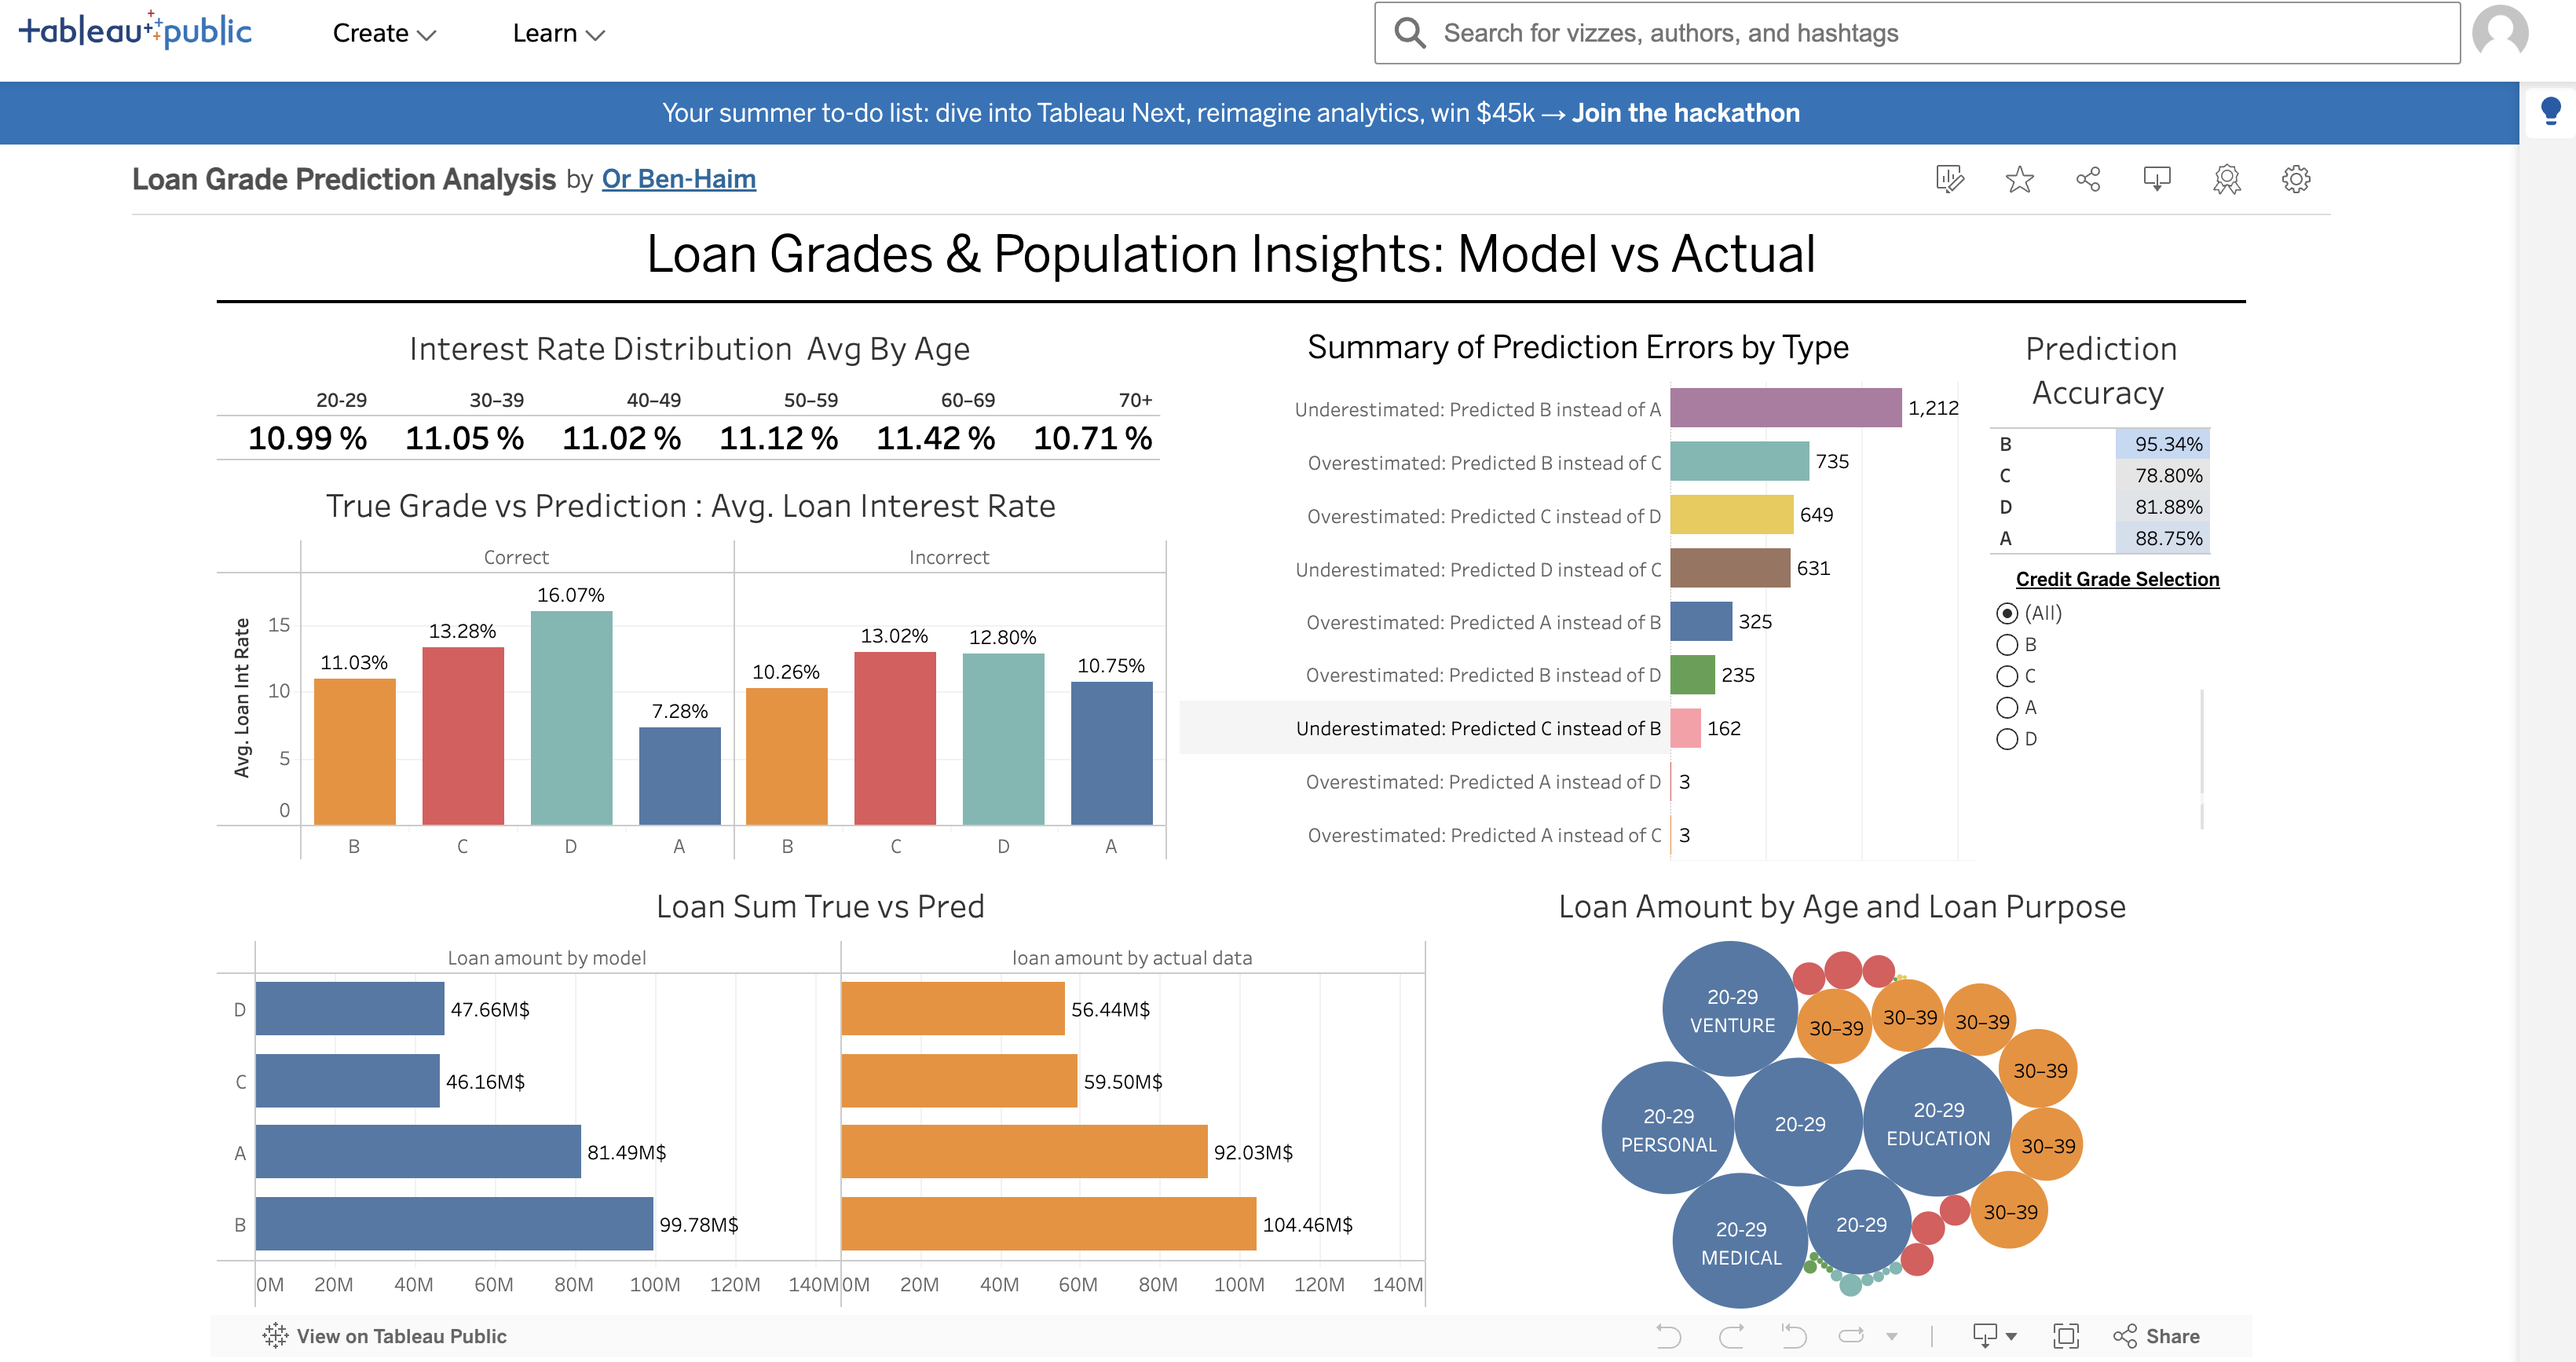


# Final Summary & Next Steps

This project built and tested a neural network to predict the credit risk level of loan applicants, using the public Kaggle Credit Risk Dataset. The process covered the full journey  from cleaning and preparing the data, through model training, to building an interactive Tableau dashboard for decision-makers.

At first, when training on the original seven loan grades, the model worked well for common grades but struggled with the rare ones. By combining the three rarest grades into a single category, the dataset became more balanced and the model’s accuracy, recall, and precision improved significantly, reaching about 88% accuracy . This makes credit approval decisions more reliable and reduces the risk of costly mistakes.

Analysis through the dashboard showed that correct predictions kept the expected link between risk level and interest rate, helping ensure loans are priced in line with risk. However, in some cases, especially between mid tier grades, the differences were blurred, which could lead to pricing that leaves money on the table. The model also tended to underestimate loan amounts, especially for Grade C, meaning capital might not be allocated optimally. Another pattern was a conservative bias that often downgraded top clients from Grade A to B, which could limit opportunities with the most profitable, low risk borrowers.

Moving forward, the model could benefit from adjusting how it separates close grades to improve pricing accuracy, adding penalties for the most costly errors to protect margins, and using algorithms that understand the natural order of grades to keep risk assessments consistent. Expanding the range of borrower information, such as transaction history, could also help increase accuracy without adding risk. Finally, integrating explainability tools would give risk managers and regulators more trust in the model’s decisions.

With these refinements, the system has the potential to become a powerful credit risk tool  one that not only improves prediction quality but also supports smarter lending strategies, keeps top customers engaged, optimizes the use of available capital, and maximizes profitability while keeping defaults low.
